In [ ]:

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import svm, datasets


#Library to validate the model
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score

**EDA**

In [ ]:
#Reading data from the csv
df =  pd.read_csv('data_moods.csv')
df.head()

,name,album,artist,id,release_date,popularity,length,danceability,acousticness,energy,instrumentalness,liveness,valence,loudness,speechiness,tempo,key,time_signature,mood
0,1999,1999,Prince,2H7PHVdQ3mXqEHXcvclTB0,1982-10-27,68,379266,0.866,0.13700,0.730,0.000000,0.0843,0.625,-8.201,0.0767,118.523,5,4,Happy
1,23,23,Blonde Redhead,4HIwL9ii9CcXpTOTzMq0MP,2007-04-16,43,318800,0.381,0.01890,0.832,0.196000,0.1530,0.166,-5.069,0.0492,120.255,8,4,Sad
2,9 Crimes,9,Damien Rice,5GZEeowhvSieFDiR8fQ2im,2006-11-06,60,217946,0.346,0.91300,0.139,0.000077,0.0934,0.116,-15.326,0.0321,136.168,0,4,Sad
3,99 Luftballons,99 Luftballons,Nena,6HA97v4wEGQ5TUClRM0XLc,1984-08-21,2,233000,0.466,0.08900,0.438,0.000006,0.1130,0.587,-12.858,0.0608,193.100,4,4,Happy
4,A Boy Brushed Red Living In Black And White,They're Only Chasing Safety,Underoath,47IWLfIKOKhFnz1FUEUIkE,2004-01-01,60,268000,0.419,0.00171,0.932,0.000000,0.1370,0.445,-3.604,0.1060,169.881,1,4,Energetic


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 686 entries, 0 to 685
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              686 non-null    object 
 1   album             686 non-null    object 
 2   artist            686 non-null    object 
 3   id                686 non-null    object 
 4   release_date      686 non-null    object 
 5   popularity        686 non-null    int64  
 6   length            686 non-null    int64  
 7   danceability      686 non-null    float64
 8   acousticness      686 non-null    float64
 9   energy            686 non-null    float64
 10  instrumentalness  686 non-null    float64
 11  liveness          686 non-null    float64
 12  valence           686 non-null    float64
 13  loudness          686 non-null    float64
 14  speechiness       686 non-null    float64
 15  tempo             686 non-null    float64
 16  key               686 non-null    int64  
 1

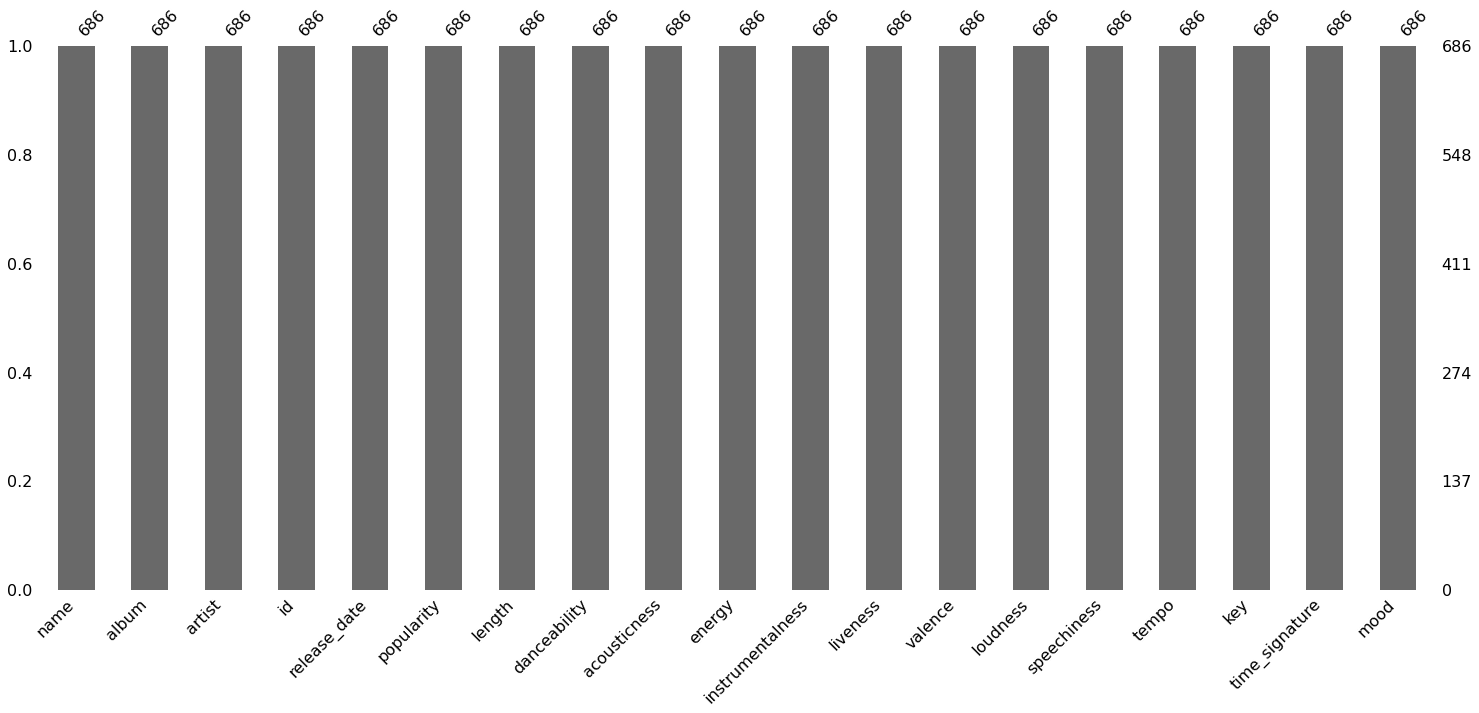

In [ ]:
ms.bar(df)
#We are plotting the bar chart to visualize the missing values using missingno(ms) library
# We notice that all the attributes in the dataset have equal number of values and no null values at all. Hence we remove none. 

In [ ]:
df.tail(15)

,name,album,artist,id,release_date,popularity,length,danceability,acousticness,energy,instrumentalness,liveness,valence,loudness,speechiness,tempo,key,time_signature,mood
671,comethru,"summer,",Jeremy Zucker,18uwL0vNUanqZH0ro2QcOP,2018-09-28,78,181613,0.795,0.607,0.1780,0.000000,0.6230,0.6080,-11.991,0.0574,93.982,0,4,Sad
672,cry on airplanes,cry on airplanes,Julian,1elEZGOMFRU5n7bnOtUaqi,2020-04-10,40,226000,0.763,0.548,0.3720,0.000638,0.1160,0.7600,-7.070,0.0683,85.010,5,4,Sad
673,i don't want to watch the world end with someo...,i don't want to watch the world end with someo...,Clinton Kane,58qX77t2VWMWcycsh9zKLc,2020-05-08,68,184505,0.535,0.771,0.3590,0.000000,0.1110,0.4880,-9.343,0.0607,154.163,2,4,Sad
674,lovely (with Khalid),lovely (with Khalid),Billie Eilish,0u2P5u6lvoDfwTYjAADbn4,2018-04-19,88,200185,0.351,0.934,0.2960,0.000000,0.0950,0.1200,-10.109,0.0333,115.284,4,4,Sad
675,mellow,sleep escape,cloudcrush,1yJXNOEP2bq1N1691n37oS,2020-05-20,48,144434,0.609,0.985,0.1570,0.792000,0.1120,0.0698,-15.792,0.0322,111.966,0,4,Calm
676,no song without you,no song without you,HONNE,3KKUf8F2hktFscLgbH4YwR,2020-06-12,75,161536,0.778,0.463,0.4620,0.583000,0.1100,0.8170,-12.729,0.0359,105.450,0,4,Sad
677,pass you by,the voicenotes,Alaina Castillo,4NVwMupCTfITPXetR5aozp,2020-04-24,60,245945,0.510,0.892,0.3550,0.000000,0.1330,0.4530,-6.883,0.0287,141.796,11,4,Sad
678,the frost,sentience,praam,7l4b5JYnl1WwUfvJgKmUwr,2020-01-24,35,254440,0.259,0.956,0.2590,0.942000,0.0923,0.0403,-18.890,0.0594,123.693,3,4,Calm
679,the theme song,notion,Teodor Wolgers,3n2QaRyg5nTg5Cwwq5mw3Q,2020-04-24,36,159840,0.604,0.986,0.0300,0.952000,0.1050,0.1500,-27.007,0.0386,117.781,0,4,Calm
680,when the party's over,"WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?",Billie Eilish,43zdsphuZLzwA9k4DJhU0I,2019-03-29,87,196077,0.367,0.978,0.1110,0.000040,0.0897,0.1980,-14.084,0.0972,82.642,4,4,Sad


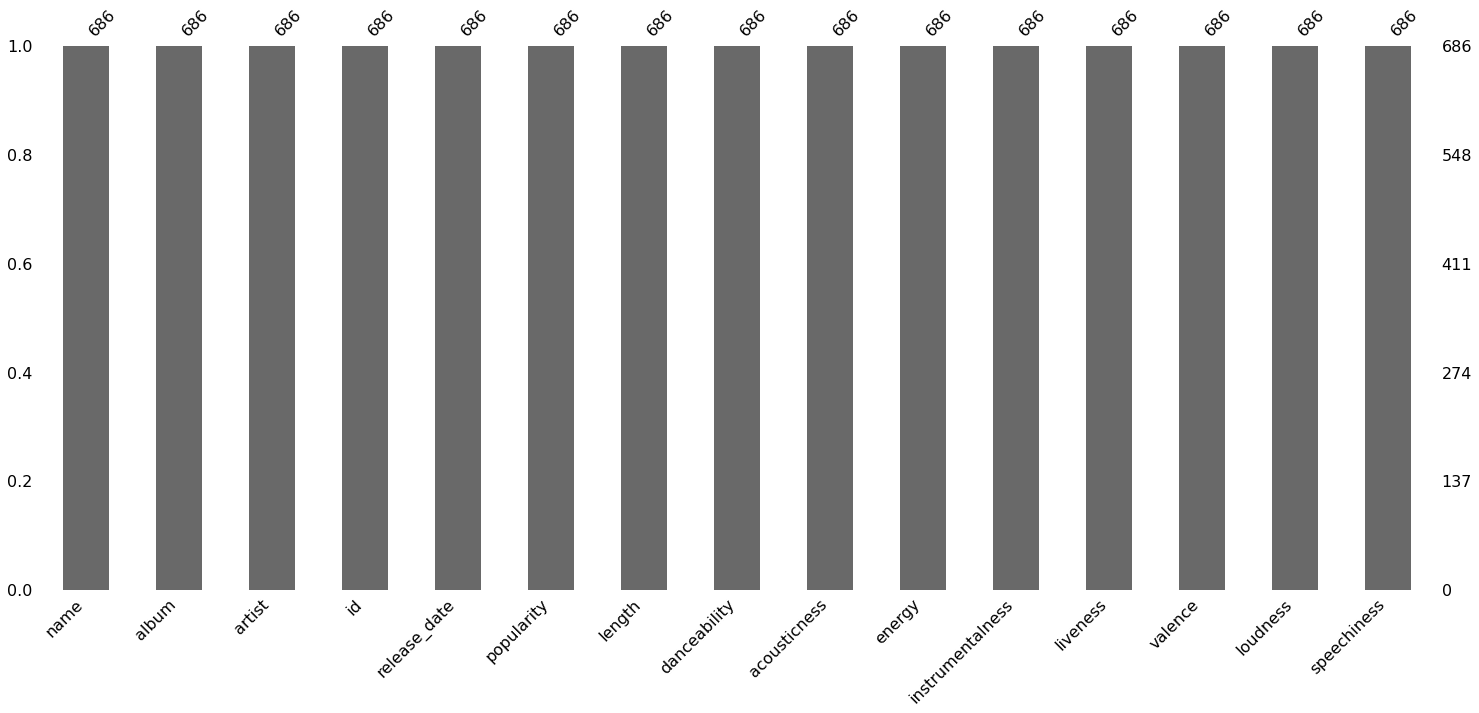

In [ ]:
#df. iloc[:, 15] selects the fifteenth column but df. iloc[:, :15] or explicitly df. iloc[:, 0:15] selects the columns until (excluding) the fifteenth column
ms.bar(df.iloc[:, 0:15])
#helps us select a specific row or column from the data set

In [ ]:
#Hence we confirmed that we have no missing or null values in the dataset 

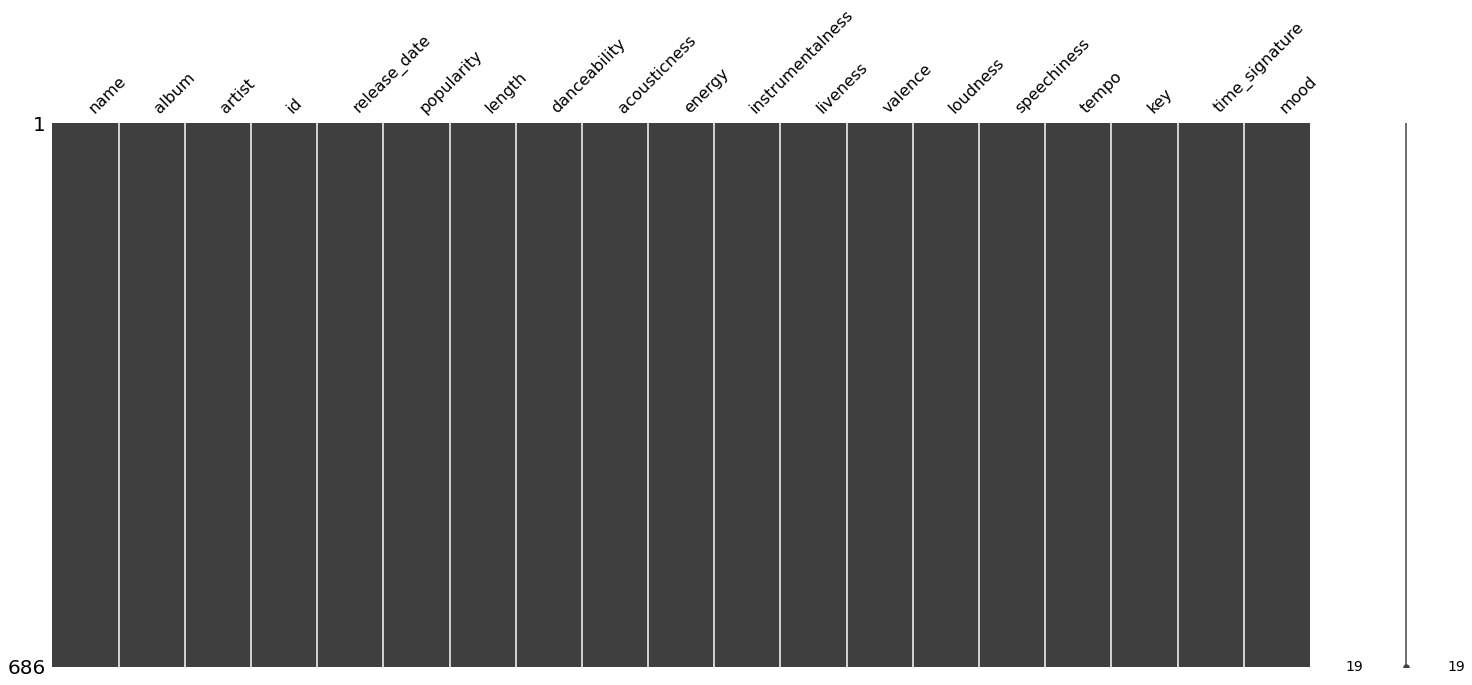

In [ ]:
ms.matrix(df)
#To check for uniformity 

In [ ]:
# spill
df2 = df[['danceability' , 'acousticness', 'energy', 'instrumentalness', 'valence','liveness', 'loudness','speechiness', 'tempo'] ]
df3 = df[['mood']]

X = df2.to_numpy() #converting panads series to numpy array 
Y =  df3.to_numpy()

In [ ]:
#Applying standardisation - for rescaling the features and to ensure consistency . (Normalization)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df2)
scaled_features = scaler.transform(df2)
df_feat = pd.DataFrame(scaled_features,columns=df2.columns[:])
df_feat.head()

,danceability,acousticness,energy,instrumentalness,valence,liveness,loudness,speechiness,tempo
0,2.300744,-0.762003,0.681395,-0.852255,1.120746,-0.581363,0.446193,0.550357,-0.021123
1,-0.752668,-1.049750,0.994037,-0.374460,-0.699816,-0.097642,0.865853,-0.114799,0.038688
2,-0.973017,1.128697,-1.130088,-0.852066,-0.898135,-0.517290,-0.508493,-0.528405,0.588217
3,-0.217534,-0.878954,-0.213619,-0.852241,0.970024,-0.379285,-0.177803,0.165776,2.554267
4,-0.513431,-1.091633,1.300548,-0.852255,0.406800,-0.210299,1.062150,1.259051,1.752438


In [ ]:
#Label encoder for classification of songs
# converting the labels into a numeric form so as to convert them into the machine-readable form
encoder = LabelEncoder()
encoder.fit(Y)
encoded_y = encoder.transform(Y)

target = pd.DataFrame({'mood':df['mood'].tolist(),'encode':encoded_y}).drop_duplicates().sort_values(['encode'],ascending=True)
target

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,mood,encode
5,Calm,0
4,Energetic,1
0,Happy,2
1,Sad,3


In [ ]:
#split dataset into train and test data
X_feat = df_feat.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X_feat, encoded_y, test_size=0.2, random_state=1)

**Classification - Supervised Learning** 

# SVM

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
  
# defining parameter range
param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000] }
  
grid_linear = GridSearchCV(SVC(kernel = 'linear'), param_grid, refit = True, verbose = 3,cv=10)
  
# fitting the model for grid search
grid_linear.fit(X_train, y_train)

# print best parameter after tuning
print(grid_linear.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid_linear.best_estimator_)

Fitting 10 folds for each of 6 candidates, totalling 60 fits
[CV 1/10] END ...........................C=0.01;, score=0.836 total time=   0.0s
[CV 2/10] END ...........................C=0.01;, score=0.873 total time=   0.0s
[CV 3/10] END ...........................C=0.01;, score=0.800 total time=   0.0s
[CV 4/10] END ...........................C=0.01;, score=0.782 total time=   0.0s
[CV 5/10] END ...........................C=0.01;, score=0.818 total time=   0.0s
[CV 6/10] END ...........................C=0.01;, score=0.764 total time=   0.0s
[CV 7/10] END ...........................C=0.01;, score=0.745 total time=   0.0s
[CV 8/10] END ...........................C=0.01;, score=0.709 total time=   0.0s
[CV 9/10] END ...........................C=0.01;, score=0.778 total time=   0.0s
[CV 10/10] END ..........................C=0.01;, score=0.833 total time=   0.0s
[CV 1/10] END ............................C=0.1;, score=0.782 total time=   0.0s
[CV 2/10] END ............................C=0.1;

Text(0, 0.5, 'Mean Test Score of training data')

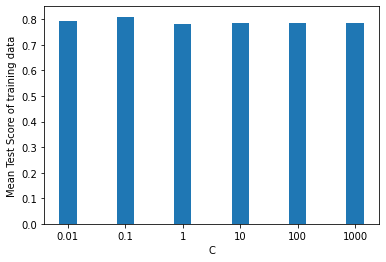

In [ ]:
#bar plot for linear svm 
d1=[0.01,0.1, 1, 10, 100, 1000]
scores_linear =  grid_linear.cv_results_['mean_test_score']
x=[]
for i in range(len(d1)):
    x.append(str(d1[i]))
scores = list(scores_linear)
plt.bar(x, scores, width = 0.3)
plt.xlabel('C')
plt.ylabel('Mean Test Score of training data')

In [ ]:
#Finding the rbf model
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
  
# defining parameter range
param_grid = {'C': [0.01,0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}
  
grid_rbf = GridSearchCV(SVC(kernel = 'rbf'), param_grid, refit = True, verbose = 3,cv=10)
  
# fitting the model for grid search
grid_rbf.fit(X_train, y_train)
# print best parameter after tuning
print(grid_rbf.best_params_)
  # print how our model looks after hyper-parameter tuning
print(grid_rbf.best_estimator_)

Fitting 10 folds for each of 30 candidates, totalling 300 fits
[CV 1/10] END ..................C=0.01, gamma=1;, score=0.291 total time=   0.0s
[CV 2/10] END ..................C=0.01, gamma=1;, score=0.291 total time=   0.0s
[CV 3/10] END ..................C=0.01, gamma=1;, score=0.291 total time=   0.0s
[CV 4/10] END ..................C=0.01, gamma=1;, score=0.291 total time=   0.0s
[CV 5/10] END ..................C=0.01, gamma=1;, score=0.291 total time=   0.0s
[CV 6/10] END ..................C=0.01, gamma=1;, score=0.291 total time=   0.0s
[CV 7/10] END ..................C=0.01, gamma=1;, score=0.273 total time=   0.0s
[CV 8/10] END ..................C=0.01, gamma=1;, score=0.291 total time=   0.0s
[CV 9/10] END ..................C=0.01, gamma=1;, score=0.296 total time=   0.0s
[CV 10/10] END .................C=0.01, gamma=1;, score=0.296 total time=   0.0s
[CV 1/10] END ................C=0.01, gamma=0.1;, score=0.309 total time=   0.0s
[CV 2/10] END ................C=0.01, gamma=0.

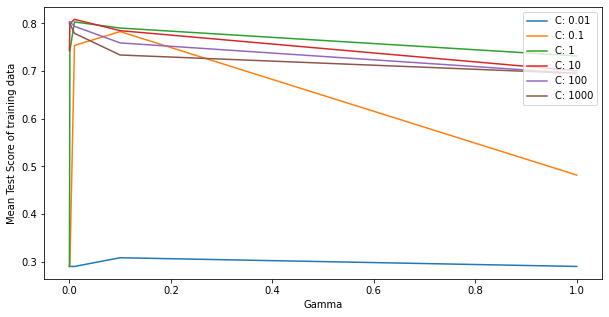

In [ ]:
#Graph for the best rbf svm
scores_rbf =  grid_rbf.cv_results_['mean_test_score']
scores = np.array(scores_rbf).reshape(len(param_grid['C']), len(param_grid['gamma']))
plt.figure(figsize=(10,5))
for ind, i in enumerate(param_grid['C']):
    plt.plot(param_grid['gamma'], scores[ind], label='C: ' + str(i))
plt.legend()

plt.xlabel('Gamma')
plt.legend(loc= 'upper right')
plt.ylabel('Mean Test Score of training data')

plt.show()

In [ ]:
#Finding the best poly kernel
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
  
# defining parameter range
param_grid = {'C': [0.01,0.1, 1, 10, 100, 1000], 
              'degree': [3, 4, 5, 6,7]}
  
grid_poly = GridSearchCV(SVC(kernel = 'poly'), param_grid, refit = True, verbose = 3,cv=10)
# fitting the model for grid search
grid_poly.fit(X_train, y_train)
# print best parameter after tuning
print(grid_poly.best_params_)
# print how our model looks after hyper-parameter tuning
print(grid_poly.best_estimator_)

Fitting 10 folds for each of 30 candidates, totalling 300 fits
[CV 1/10] END .................C=0.01, degree=3;, score=0.473 total time=   0.0s
[CV 2/10] END .................C=0.01, degree=3;, score=0.473 total time=   0.0s
[CV 3/10] END .................C=0.01, degree=3;, score=0.400 total time=   0.0s
[CV 4/10] END .................C=0.01, degree=3;, score=0.400 total time=   0.0s
[CV 5/10] END .................C=0.01, degree=3;, score=0.418 total time=   0.0s
[CV 6/10] END .................C=0.01, degree=3;, score=0.400 total time=   0.0s
[CV 7/10] END .................C=0.01, degree=3;, score=0.455 total time=   0.0s
[CV 8/10] END .................C=0.01, degree=3;, score=0.400 total time=   0.0s
[CV 9/10] END .................C=0.01, degree=3;, score=0.426 total time=   0.0s
[CV 10/10] END ................C=0.01, degree=3;, score=0.407 total time=   0.0s
[CV 1/10] END .................C=0.01, degree=4;, score=0.455 total time=   0.0s
[CV 2/10] END .................C=0.01, degree=

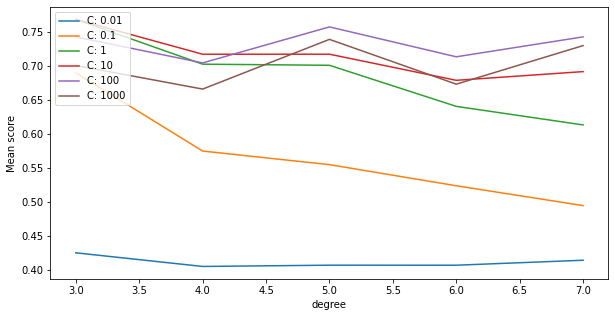

In [ ]:
#Plotting graph for the best poly kernel svm
scores_poly =  grid_poly.cv_results_['mean_test_score']
scores = np.array(scores_poly).reshape(len(param_grid['C']), len(param_grid['degree']))
plt.figure(figsize=(10,5))
for ind, i in enumerate(param_grid['C']):
    plt.plot(param_grid['degree'], scores[ind], label='C: ' + str(i))
plt.legend(loc= 'upper left')
plt.xlabel('degree')
plt.ylabel('Mean score')
plt.show()

The Best fit estimators for the three kernels are as follows: 


Linear Kernel SVC(C=0.1, kernel='linear')
rbf Kernel SVC(C=10, gamma=0.01)
poly Kernel SVC(C=1, kernel='poly')
Max Score  with Linear Kernel :  0.8103367003367004
Max Score with rbf Kernel :  0.8084511784511784
Max Score with poly Kernel :  0.7684175084175084
Accuracy of the Validation set with Linear Kernel :  0.8188405797101449
Accuracy of the Validation set with rbf Kernel :  0.8043478260869565
Accuracy of the Validation set with poly Kernel :  0.7971014492753623


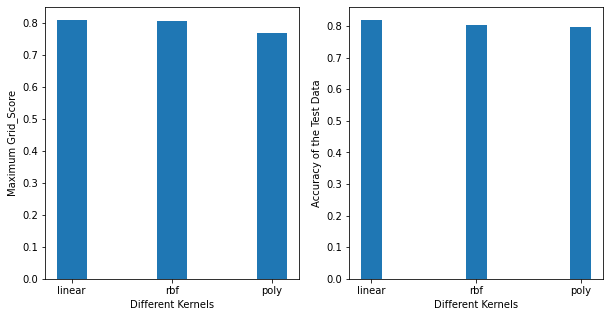

In [ ]:
#Predicting the accuracy for svm and choosing the best kernel
linear_max_training_accuracy = max(scores_linear)
rbf_max_training_accuracy = max(scores_rbf)
poly_max_training_accuracy  = max(scores_poly)
print("The Best fit estimators for the three kernels are as follows: ")
print("\n")
print("Linear Kernel" ,grid_linear.best_estimator_ )
print("rbf Kernel" ,grid_rbf.best_estimator_ )
print("poly Kernel" ,grid_poly.best_estimator_ )
print("===================================================================")
print("Max Score  with Linear Kernel : ",linear_max_training_accuracy)
print("Max Score with rbf Kernel : ",rbf_max_training_accuracy)
print("Max Score with poly Kernel : ",poly_max_training_accuracy)
print("====================================================================")
x = ['linear','rbf' ,'poly']
y = [linear_max_training_accuracy,rbf_max_training_accuracy,poly_max_training_accuracy]
linear_max_test_accuracy = grid_linear.score(X_test, y_test)
rbf_max_test_accuracy = grid_rbf.score(X_test, y_test)
poly_max_test_accuracy = grid_poly.score(X_test, y_test)
print("Accuracy of the Validation set with Linear Kernel : ",linear_max_test_accuracy)
print("Accuracy of the Validation set with rbf Kernel : ",rbf_max_test_accuracy)
print("Accuracy of the Validation set with poly Kernel : ",poly_max_test_accuracy)

x_test_acc = [linear_max_test_accuracy,rbf_max_test_accuracy,poly_max_test_accuracy]

plt.figure(figsize=(10,5))
plt.subplot(121)
plt.bar(x, y, width = 0.3)
plt.xlabel('Different Kernels')
plt.ylabel('Maximum Grid_Score')


plt.subplot(122)
plt.bar(x, x_test_acc, width = 0.2)
plt.xlabel('Different Kernels')
plt.ylabel('Accuracy of the Test Data')
plt.show()


              precision    recall  f1-score   support

           0       0.95      0.97      0.96        36
           1       0.81      0.78      0.79        37
           2       0.50      0.57      0.53        23
           3       0.87      0.81      0.84        42

    accuracy                           0.80       138
   macro avg       0.78      0.78      0.78       138
weighted avg       0.81      0.80      0.81       138



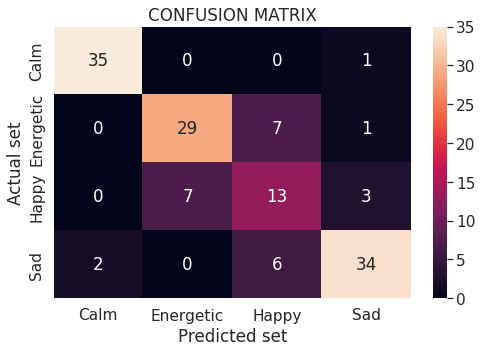

In [ ]:
#Confusion matrix and classification report of svm
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.metrics import confusion_matrix
prediction = grid_rbf.predict(X_test)
print(classification_report(y_test,prediction))
cf_matrix = confusion_matrix(y_test, prediction)
labels = ['Calm','Energetic','Happy','Sad']
plt.figure(figsize=(8, 5))
sns.set(font_scale=1.4)  # for label size
sns.heatmap(cf_matrix, annot=True ,xticklabels=labels, yticklabels=labels)
plt.title('CONFUSION MATRIX')
plt.ylabel('Actual set')
plt.xlabel('Predicted set')
plt.show()

# KNN

{'n_neighbors': 23}
0.7863973063973064
              precision    recall  f1-score   support

           0       0.86      1.00      0.92        36
           1       0.82      0.86      0.84        37
           2       0.58      0.65      0.61        23
           3       0.94      0.69      0.79        42

    accuracy                           0.81       138
   macro avg       0.80      0.80      0.79       138
weighted avg       0.82      0.81      0.81       138



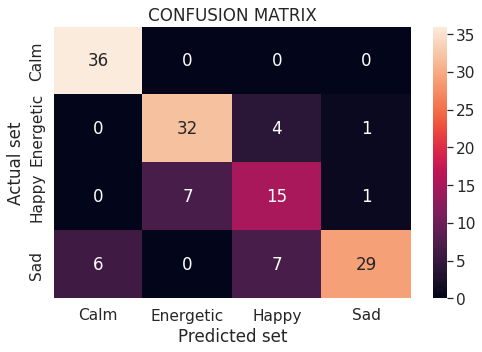

In [ ]:
from sklearn.model_selection import GridSearchCV 
# GridSearchCV loops through predefined hyperparameters and fit your estimator (model) on your training set. So, in the end, you can select the best parameters from the listed hyperparameters.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.metrics import confusion_matrix
#create new a knn model
knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {"n_neighbors": np.arange(1, 30)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=10)
#fit model to data
knn_gscv.fit(X_train, y_train)
print(knn_gscv.best_params_)
print(knn_gscv.best_score_)
predict_knn=knn_gscv.predict(X_test)
cf_matrix_knn = confusion_matrix(y_test,predict_knn)
print(classification_report(y_test,predict_knn))
labels = ['Calm','Energetic','Happy','Sad']
plt.figure(figsize=(8, 5))
sns.set(font_scale=1.4)  # for label size
sns.heatmap(cf_matrix_knn, annot=True ,xticklabels=labels, yticklabels=labels)
plt.title('CONFUSION MATRIX')
plt.ylabel('Actual set')
plt.xlabel('Predicted set')
plt.show()

[0.7134680134680135, 0.7207407407407408, 0.7500673400673401, 0.7537037037037037, 0.7664646464646465, 0.7590909090909091, 0.7555218855218854, 0.7645454545454545, 0.760942760942761, 0.7827946127946128, 0.7773063973063974, 0.7736026936026936, 0.7626599326599327, 0.7608754208754209, 0.7755218855218856, 0.7645117845117846, 0.7717845117845118, 0.7663299663299664, 0.7645117845117846, 0.7699663299663301, 0.7772727272727273, 0.7718181818181818, 0.7863973063973064, 0.7863636363636364, 0.7809427609427609, 0.780976430976431, 0.779158249158249, 0.7755218855218855, 0.7810101010101012, 0.7718518518518518]


Text(0, 0.5, 'Cross-validated accuracy')

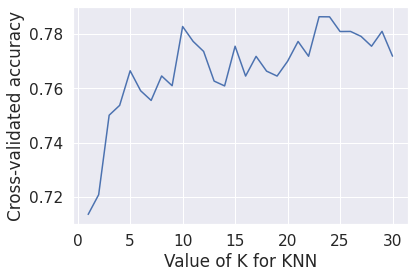

In [ ]:
import matplotlib.pyplot as plt

# search for an optimal value of K for KNN
# range of k we want to try
k_range = range(1, 31)
# empty list to store scores
k_scores = []

# 1. we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())
print(k_scores)
# plot how accuracy changes as we vary k


# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
# plt.plot(x_axis, y_axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validated accuracy')

# Unsupervised Learning 

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
plt.style.use("seaborn")
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [ ]:

df = df[['name','album','artist','id','release_date','popularity','danceability','energy','valence','loudness']]

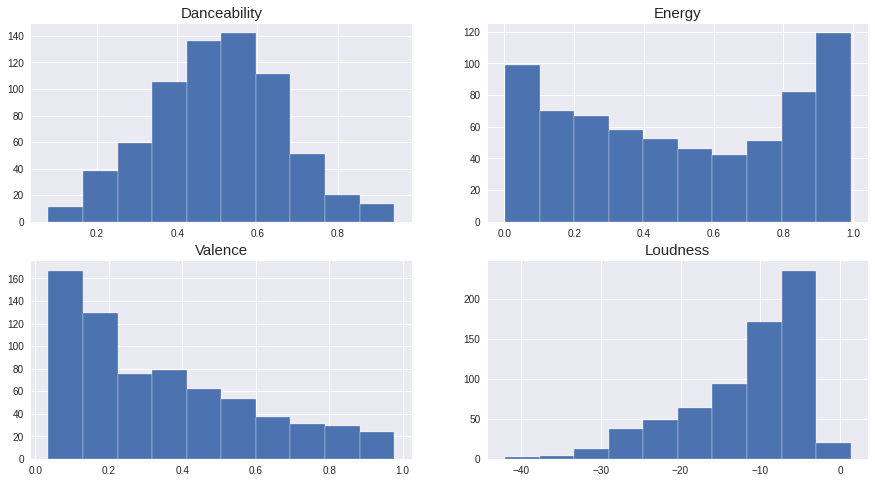

In [ ]:
fig,axes = plt.subplots(2,2,figsize=(15,8))

axes[0,0].hist(df['danceability'])
axes[0,0].set_title('Danceability',fontsize=15)
axes[0,1].hist(df['energy'])
axes[0,1].set_title('Energy',fontsize=15)
axes[1,0].hist(df['valence'])
axes[1,0].set_title('Valence',fontsize=15)
axes[1,1].hist(df['loudness'])
axes[1,1].set_title('Loudness',fontsize=15)
plt.show()

In [ ]:
df.describe()

,popularity,danceability,energy,valence,loudness
count,686.000000,686.000000,686.000000,686.000000,686.000000
mean,41.534985,0.500553,0.507693,0.342438,-11.531020
std,23.045707,0.158955,0.326490,0.252304,7.468629
min,0.000000,0.078900,0.001290,0.035300,-42.018000
25%,30.000000,0.388000,0.202000,0.131250,-15.858750
50%,47.000000,0.505000,0.495500,0.282000,-9.358000
75%,57.000000,0.612000,0.844000,0.508750,-5.634500
max,88.000000,0.941000,0.994000,0.977000,1.342000


In [ ]:
col_features = df.columns[6:]
X = MinMaxScaler().fit_transform(df[col_features])

In [ ]:
kmeans = KMeans(init="k-means++",n_clusters=2,random_state=15).fit(X)

In [ ]:
df['kmeans'] = kmeans.labels_

Text(0.5, 0.92, '3D Scatter Plot of Songs Clustered')

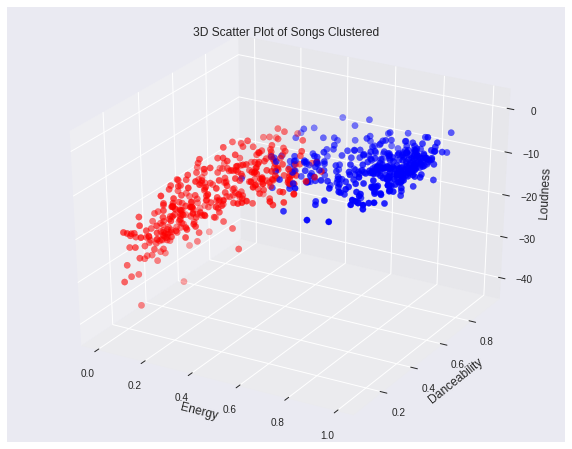

In [ ]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111,projection='3d')

x = df['energy']
y = df['danceability']
z = df['loudness']
cmhot = cmhot = plt.get_cmap('bwr')

ax.scatter(x,y,z,c=df['kmeans'],s=40,cmap=cmhot)
ax.set_xlabel('Energy',fontsize=12)
ax.set_ylabel('Danceability',fontsize=12)
ax.set_zlabel('Loudness',fontsize=12)
ax.set_title("3D Scatter Plot of Songs Clustered")


In [ ]:
df.groupby(['kmeans']).mean()



,popularity,danceability,energy,valence,loudness
kmeans,,,,,
0,42.945869,0.563308,0.785667,0.498192,-6.301917
1,40.056716,0.434801,0.216444,0.179244,-17.009872


In [ ]:
cluster_0 = df[df['kmeans']==0]
cluster_1  = df[df['kmeans']==1]

In [ ]:
cluster_0.to_csv("c0.csv",index=False)
cluster_1.to_csv("c1.csv",index=False)


In [ ]:
df1 = pd.read_csv('c0.csv')
df2 = pd.read_csv('c1.csv')

Song Recommendation Model

In [ ]:
import numpy
import pandas
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.linear_model import LogisticRegression, LinearRegression

In [ ]:
#In this part we made a Linear Regression model to predict popularity.

In [ ]:
# encoded columns with non-numerical data which were artists and name in order to use them in our model

In [ ]:
le = LabelEncoder()
for i in df1[['artist', 'name']]:
  df1[i] = le.fit_transform(df1[i])

In [ ]:
#We decided to train our model based on popularity > 60, 60 =<popularity< 0, and popularity<= 0.
# We sampled them based on the smallest value count out of the three subsets mentioned above. Concatenating all 3 subsets we made a balanced dataframe. Using this new data frame, we ran the score model to predict the best possible score.
# Moreover, after receiving score, recreated a linear model based on the new data framed.

In [ ]:
pop_df = df1[df1['popularity']>60]

In [ ]:
nonpop_df = df1[(df1['popularity']<=60) & (df1['popularity']>0)].sample(n=pop_df.shape[0])

In [ ]:
zero_under_df =df1[df1['popularity']<=60].sample(n=pop_df.shape[0])

In [ ]:
zero_under_df.shape

(90, 11)

In [ ]:
pop_df.shape

(90, 11)

In [ ]:
nonpop_df.shape

(90, 11)

In [ ]:
balanced_df = pd.concat([pop_df,nonpop_df, zero_under_df])

In [ ]:
X_score2 = balanced_df[['valence', 'danceability','energy',
                        'loudness', 'name', 'popularity']]
y_score2 = balanced_df['popularity']

In [ ]:
#In order to get a combination of columns that would give us the best score, we made a function powerset that tries out all possible combinations and their scores and gives us the best combination of columns and 
#the score our Linear Regression model would have.

In [ ]:
from itertools import chain, combinations

In [ ]:
lr = LinearRegression()

In [ ]:
X = balanced_df[['valence', 'danceability','energy',
                        'loudness', 'name', 'popularity']]
y = balanced_df['popularity']

In [ ]:
lr.fit(X, y)
y_pred = lr.predict(X)

In [ ]:
lr.score(X, y)

1.0